<a href="https://colab.research.google.com/github/muhammadtarek98/deep-learning-curve-A.I-solutions-internship/blob/main/human_pose_estimation_mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive  
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install opencv-python
!pip install mediapipe

     |████████████████████████████████| 32.7 MB 227 kB/s 


In [ ]:
import cv2 as cv
import mediapipe as mp
import matplotlib.pyplot as plt
import os

In [ ]:
mp_model=mp.solutions.pose
mp_draw=mp.solutions.drawing_utils
pose=mp_model.Pose(static_image_mode=True)
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
def processing(image):
  results = pose.process(image)
  if results.pose_landmarks:
          mp_draw.draw_landmarks(image, results.pose_landmarks, mp_model.POSE_CONNECTIONS)
          for id, lm in enumerate(results.pose_landmarks.landmark):
#              print(id, lm)
              image=cv.circle(image,center= (int(lm.x), int(lm.y)),radius= 5,color= (255, 0, 0),thickness=-1)
          plt.imshow(image)
          plt.show()
  return image

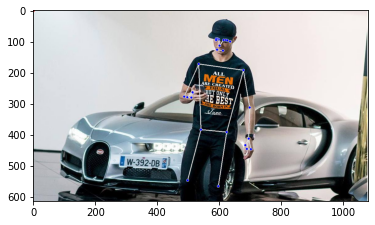

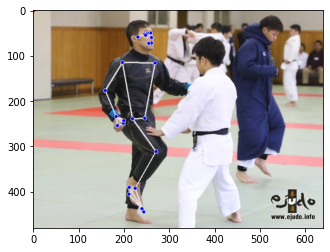

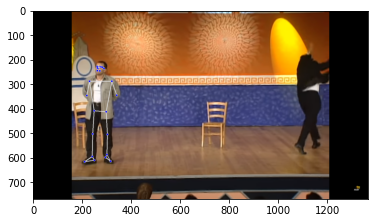

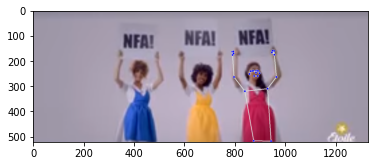

In [ ]:
dir="/content/drive/MyDrive/human_pose_estimation/"
lst=[dir+file for file in os.listdir(dir)]
new_name=0
for file in lst:  
  if "png" in file or "jpg" in file or "PNG" in file or "JPG" in file:
    input_image=cv.imread(file)
    input_image=cv.cvtColor(input_image,cv.COLOR_BGR2RGB)
    output_image=processing(input_image)
    save_dir="/content/drive/MyDrive/human_pose_estimation/results/"+str(new_name)+"mediapipe.jpg"
    cv.imwrite(save_dir,cv.cvtColor(output_image,cv.COLOR_BGR2RGB))
    new_name+=1